# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Thyroid_ML_Project/thyroidDF.csv")
df.head(7)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,21.0,other,-,840803068


In [ ]:
df.shape

(9172, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df['target'].value_counts()

,count
target,
-,6771
K,436
G,359
I,346
F,233
R,196
A,147
L,115
M,111


# Remapping Target values



In [ ]:
# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'no thyroid',
             'A': 'hyperthyroid',
             'AK': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'C|I': 'hyperthyroid',
             'D': 'hyperthyroid',
             'D|R': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'G': 'hypothyroid',
             'H': 'hypothyroid',
             'GK': 'hypothyroid',
             'GI': 'hypothyroid',
             'H|K': 'hypothyroid',
             'FK': 'hypothyroid',
             'GKJ': 'hypothyroid'
             }

df['target'] = df['target'].map(diagnoses)
# dropping observations with 'target' NaN after re-mapping
df.dropna(subset=['target'], inplace=True)

In [ ]:
df['target'].value_counts()

,count
target,
no thyroid,6771
hypothyroid,667
hyperthyroid,241


#  Handling Missing Values

In [ ]:
dfdup=df.copy()

In [ ]:
dfdup.isnull().sum()

,0
age,0
sex,254
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


* sex has 307 missing values - 3.35 %
* TSH has 842 missing values - 9.2 %
* T3 has 2604 missing values - 28.4 %
* TT4 has 442 missing values - 4.82 %
* T4U has 809 missing values - 8.8 %
* FTI has 802 missing values - 8.7 %
* TBG has 8823 missing values - 96.2 %
* so drop TBG and TBG_measured
* TBG_measured,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured are redundant attributes
* also drop patient_id,referral_source (irrelevant)

In [ ]:
#  Dropping redundant attributes
dfdup.drop(['TBG_measured','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG','referral_source', 'patient_id'],axis=1, inplace=True)

In [ ]:
dfdup['TSH'].fillna(dfdup['TSH'].mean(), inplace=True)
dfdup['T3'].fillna(dfdup['T3'].mean(), inplace=True)
dfdup['TT4'].fillna(dfdup['TT4'].mean(), inplace=True)
dfdup['T4U'].fillna(dfdup['T4U'].mean(), inplace=True)
dfdup['FTI'].fillna(dfdup['FTI'].mean(), inplace=True)
dfdup.dropna(subset=['sex'], inplace=True)

In [ ]:
dfdup.isnull().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [ ]:
dfdup['target'].value_counts()

,count
target,
no thyroid,6559
hypothyroid,642
hyperthyroid,224


In [ ]:
dfdup.shape

(7425, 22)

#  Handling Outliers

In [ ]:
dfdup.describe()

,age,TSH,T3,TT4,T4U,FTI
count,7425.000000,7425.000000,7425.000000,7425.000000,7425.000000,7425.000000
mean,78.558923,5.451043,2.004924,105.411359,0.968015,110.506591
std,1315.843450,24.419250,0.680034,32.283443,0.155273,32.995194
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000
25%,37.000000,0.620000,1.700000,88.000000,0.880000,95.000000
50%,55.000000,1.600000,2.010773,104.000000,0.967297,110.941312
75%,67.000000,3.700000,2.200000,120.000000,1.050000,123.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,642.000000


In [ ]:
print(dfdup['age'].sort_values().tail(10))

3938       94
5238       94
8968       95
790        97
7355       97
7356       97
2976      455
5710    65511
6392    65512
8105    65526
Name: age, dtype: int64


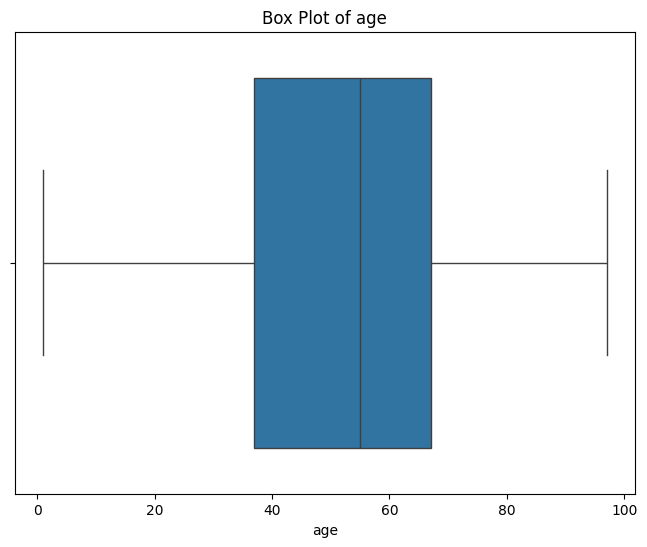

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dropping 'age' > 100
dfdup['age'] = np.where((dfdup.age > 100), np.nan, dfdup.age)
dfdup.dropna(subset=['age'], inplace=True)

#Boxplot for age

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['age'])
plt.title('Box Plot of age')
plt.show()

In [ ]:
dfdup.shape

(7421, 22)

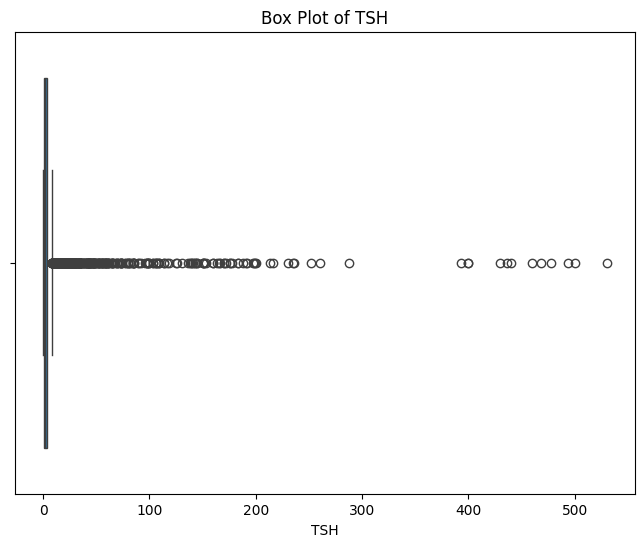

In [ ]:
#Boxplot for TSH

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['TSH'])
plt.title('Box Plot of TSH')
plt.show()

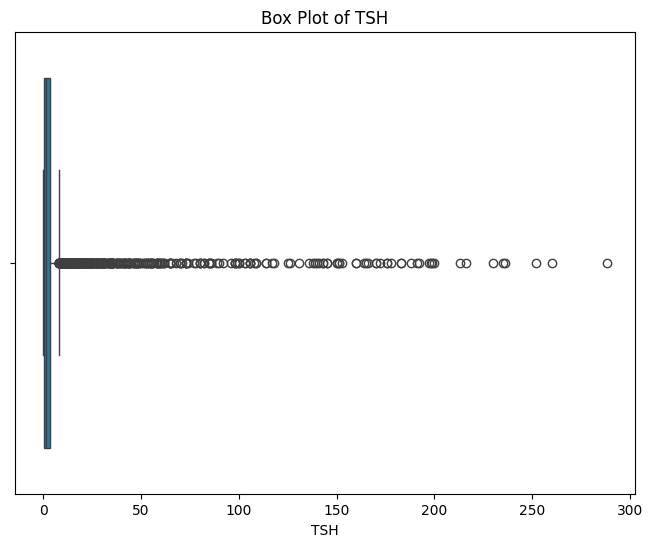

In [ ]:
import numpy as np
# dropping 'TSH' > 300
dfdup['TSH'] = np.where((dfdup.TSH > 300), np.nan, dfdup.TSH)
dfdup.dropna(subset=['TSH'], inplace=True)

#Boxplot for age

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['TSH'])
plt.title('Box Plot of TSH')
plt.show()

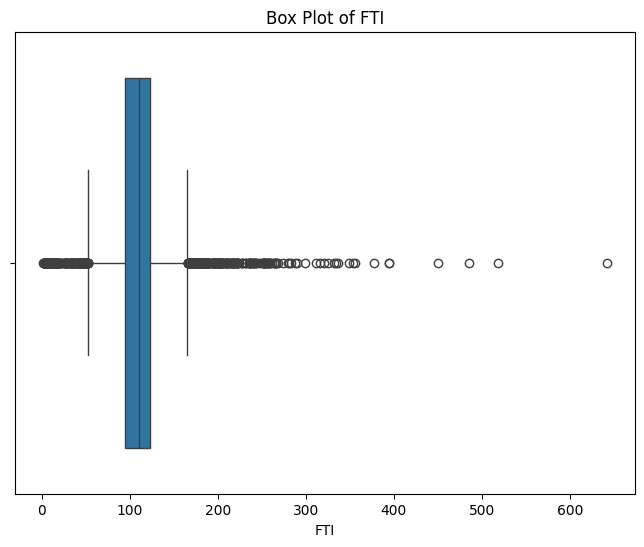

In [ ]:
#Boxplot for FTI

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['FTI'])
plt.title('Box Plot of FTI')
plt.show()

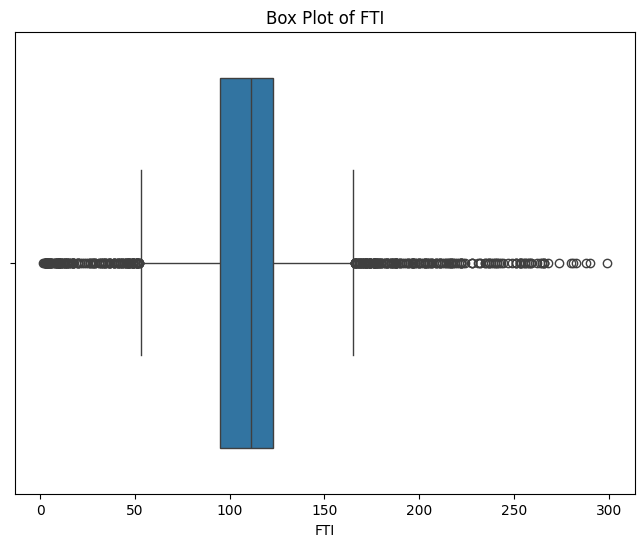

In [ ]:
import numpy as np
# dropping 'FTI' > 300
dfdup['FTI'] = np.where((dfdup.FTI > 300), np.nan, dfdup.FTI)
dfdup.dropna(subset=['FTI'], inplace=True)

#Boxplot for age

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfdup['FTI'])
plt.title('Box Plot of FTI')
plt.show()

In [ ]:
dfdup.shape

(7392, 22)

In [ ]:
dfdup.describe()

,age,TSH,T3,TT4,T4U,FTI
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,52.088203,4.738107,1.995644,105.073098,0.968002,110.022840
std,18.621483,16.468087,0.610902,30.340857,0.154926,29.714801
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000
25%,37.000000,0.630000,1.700000,88.000000,0.880000,95.000000
50%,55.000000,1.600000,2.010773,104.000000,0.967297,110.941312
75%,67.000000,3.625000,2.100000,120.000000,1.050000,123.000000
max,97.000000,288.000000,8.900000,302.000000,2.120000,299.000000


In [ ]:
dfdup['target'].value_counts()

,count
target,
no thyroid,6553
hypothyroid,630
hyperthyroid,209


# Handling Class Imbalance

Text(0, 0.5, 'Count')

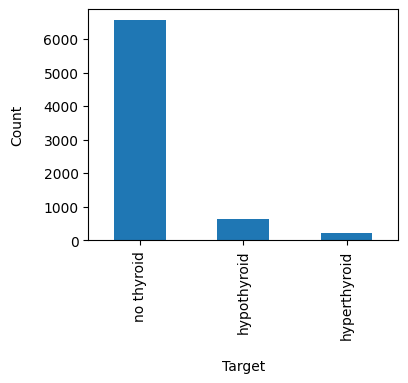

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfdup['target'].value_counts().plot(kind='bar',figsize=(4,3))
plt.xlabel("Target",labelpad=14)
plt.ylabel("Count",labelpad=14)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = dfdup.drop('target', axis=1)
y = dfdup['target']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
dfdup = pd.concat([X_res, y_res], axis=1)

Text(0, 0.5, 'Count')

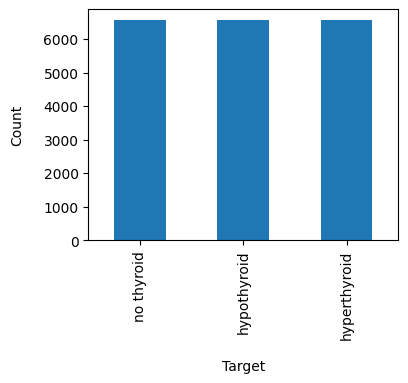

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dfdup['target'].value_counts().plot(kind='bar',figsize=(4,3))
plt.xlabel("Target",labelpad=14)
plt.ylabel("Count",labelpad=14)


In [ ]:
dfdup.shape

(19659, 22)

In [ ]:
dfdup['target'].value_counts()

,count
target,
no thyroid,6553
hypothyroid,6553
hyperthyroid,6553


# Identifying trends and patterns

<Axes: xlabel='target', ylabel='count'>

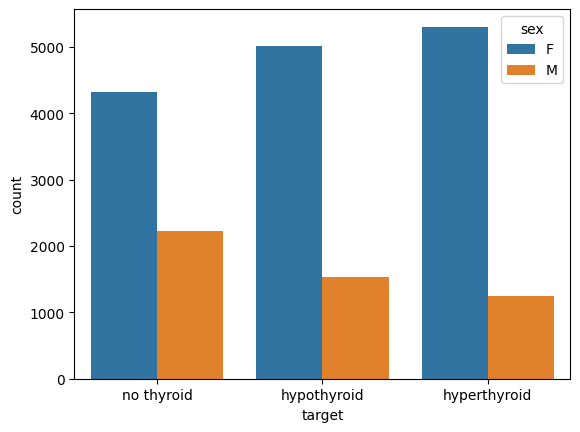

In [ ]:
sns.countplot(data=dfdup,x='target', hue='sex')

<Axes: xlabel='target', ylabel='count'>

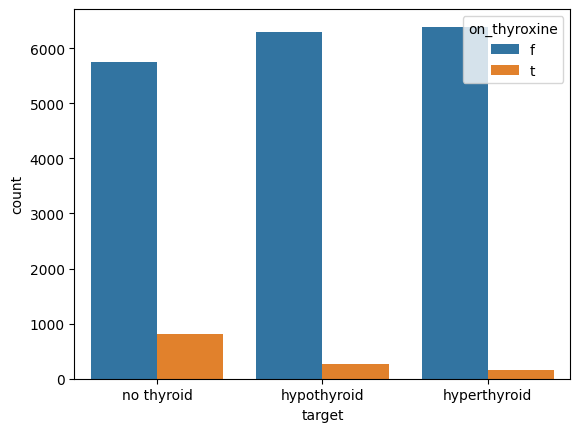

In [ ]:
sns.countplot(data=dfdup,x='target', hue='on_thyroxine')

<Axes: xlabel='target', ylabel='count'>

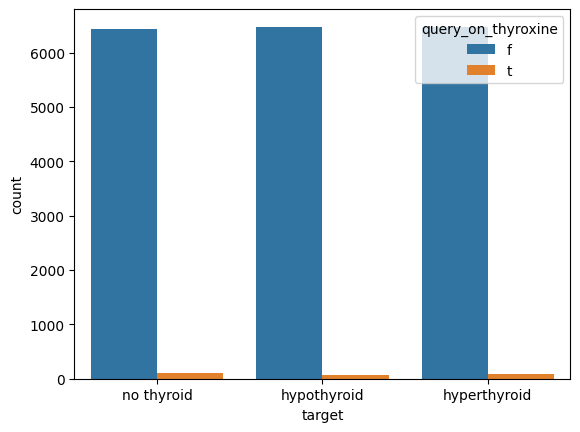

In [ ]:
sns.countplot(data=dfdup,x='target', hue='query_on_thyroxine')

<Axes: xlabel='target', ylabel='count'>

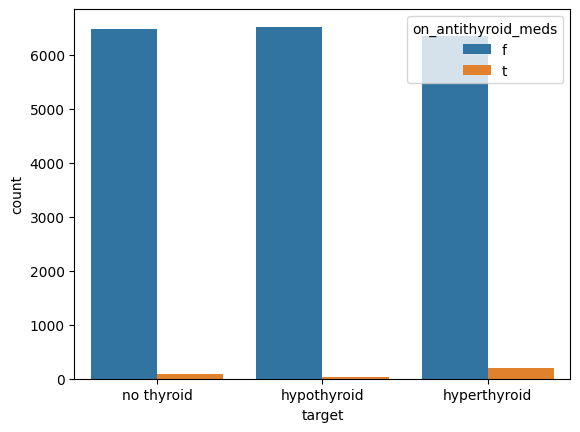

In [ ]:
sns.countplot(data=dfdup,x='target', hue='on_antithyroid_meds')

<Axes: xlabel='target', ylabel='count'>

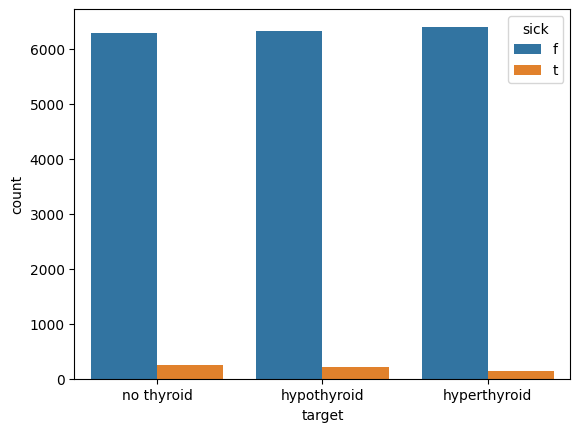

In [ ]:
sns.countplot(data=dfdup,x='target', hue='sick')

<Axes: xlabel='target', ylabel='count'>

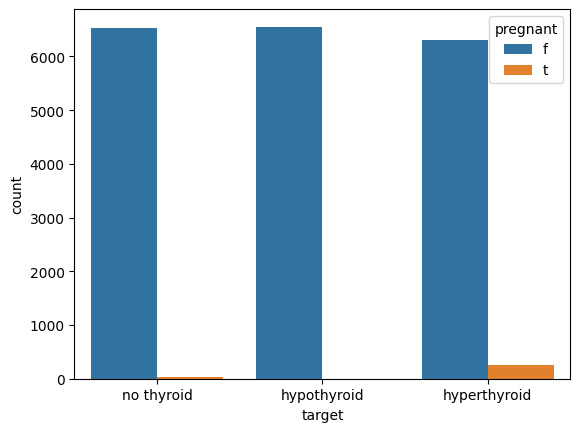

In [ ]:
sns.countplot(data=dfdup,x='target', hue='pregnant')

<Axes: xlabel='target', ylabel='count'>

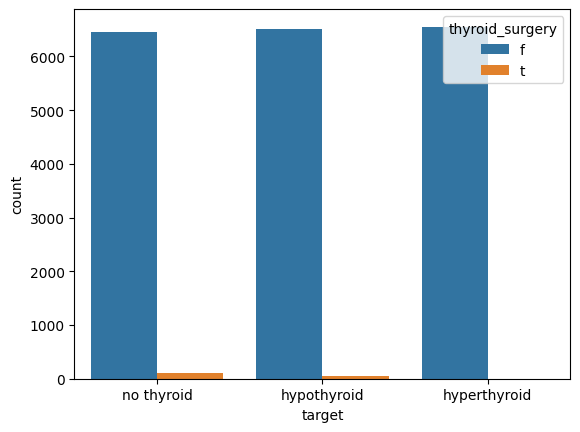

In [ ]:
sns.countplot(data=dfdup,x='target', hue='thyroid_surgery')

<Axes: xlabel='target', ylabel='count'>

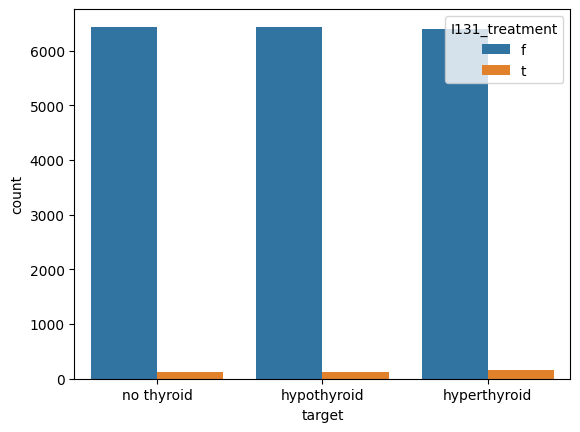

In [ ]:
sns.countplot(data=dfdup,x='target', hue='I131_treatment')

<Axes: xlabel='target', ylabel='count'>

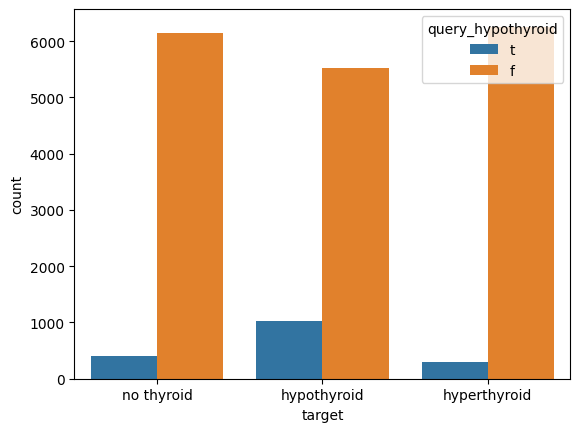

In [ ]:
sns.countplot(data=dfdup,x='target', hue='query_hypothyroid')

<Axes: xlabel='target', ylabel='count'>

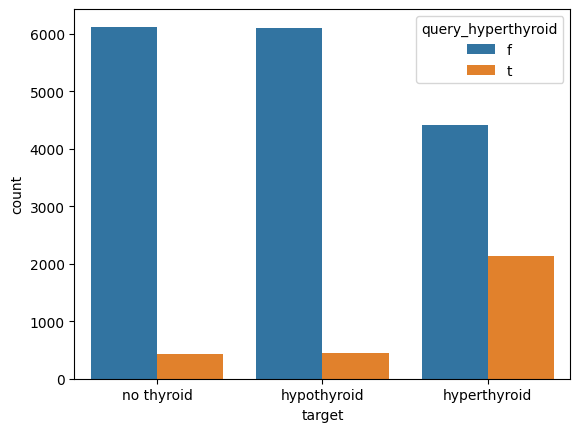

In [ ]:
sns.countplot(data=dfdup,x='target', hue='query_hyperthyroid')

<Axes: xlabel='target', ylabel='count'>

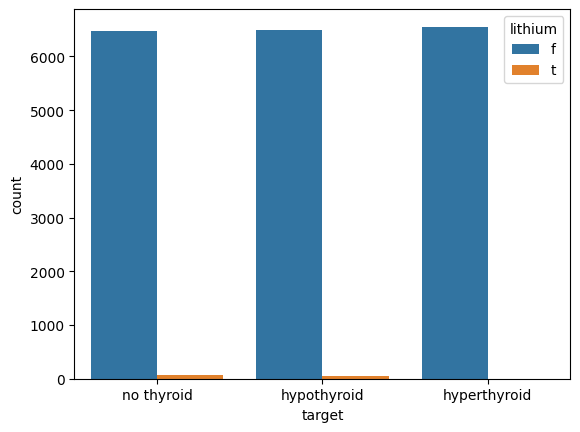

In [ ]:
sns.countplot(data=dfdup,x='target', hue='lithium')

<Axes: xlabel='target', ylabel='count'>

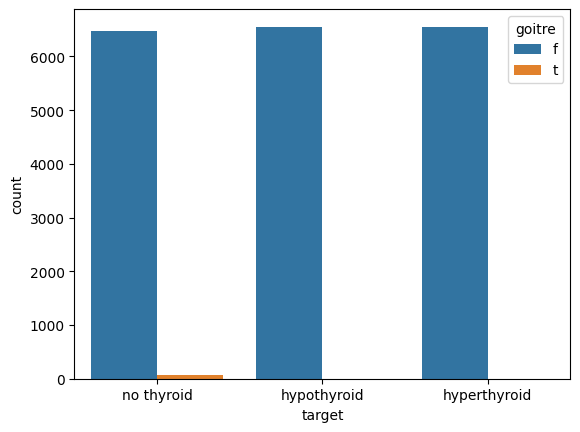

In [ ]:
sns.countplot(data=dfdup,x='target', hue='goitre')

<Axes: xlabel='target', ylabel='count'>

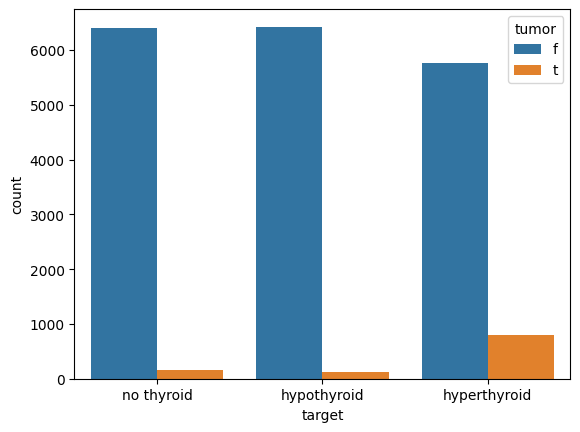

In [ ]:
sns.countplot(data=dfdup,x='target', hue='tumor')

<Axes: xlabel='target', ylabel='count'>

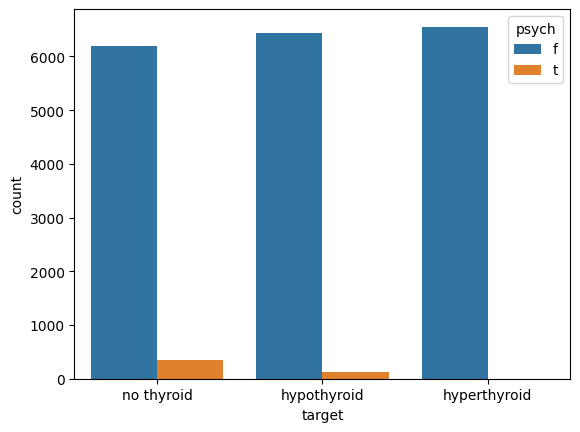

In [ ]:
sns.countplot(data=dfdup,x='target', hue='psych')

<Axes: xlabel='target', ylabel='count'>

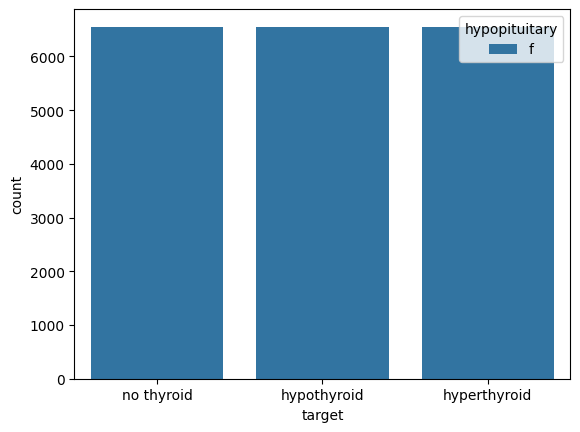

In [ ]:
sns.countplot(data=dfdup,x='target', hue='hypopituitary')

<Axes: >

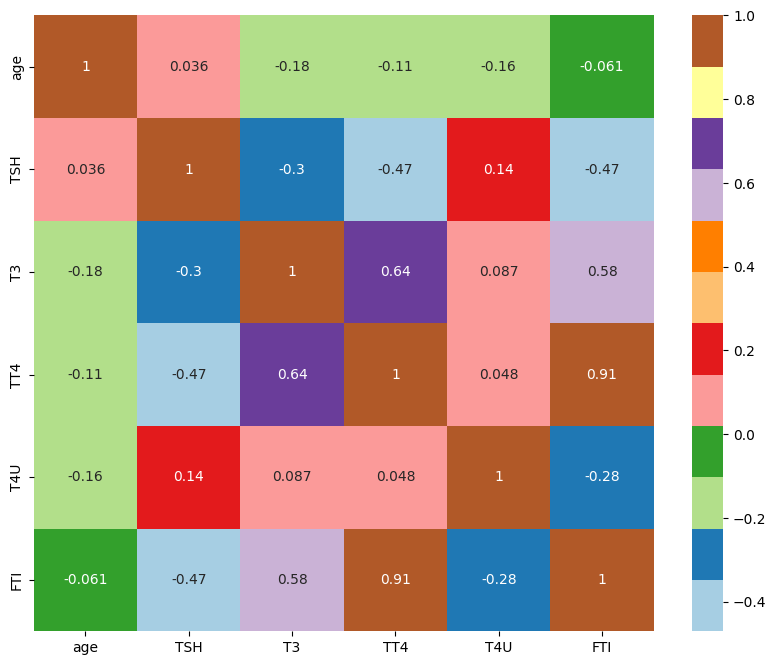

In [ ]:
new_df=dfdup.drop(columns=dfdup.drop(columns=['age','TSH','T3','TT4','T4U','FTI']))
plt.figure(figsize=(10,8))  # Set the size of the plot
sns.heatmap(new_df.corr(),cmap="Paired",annot=True)

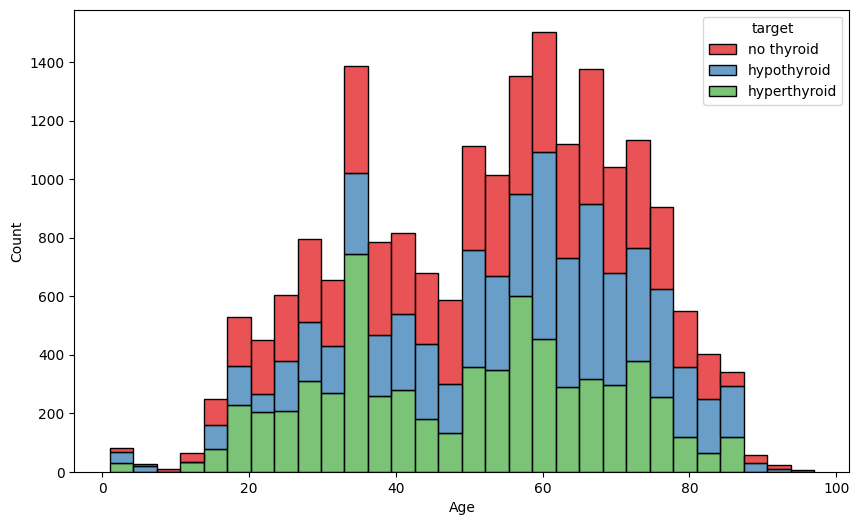

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='age', hue='target', multiple='stack', palette='Set1', bins=30)

plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



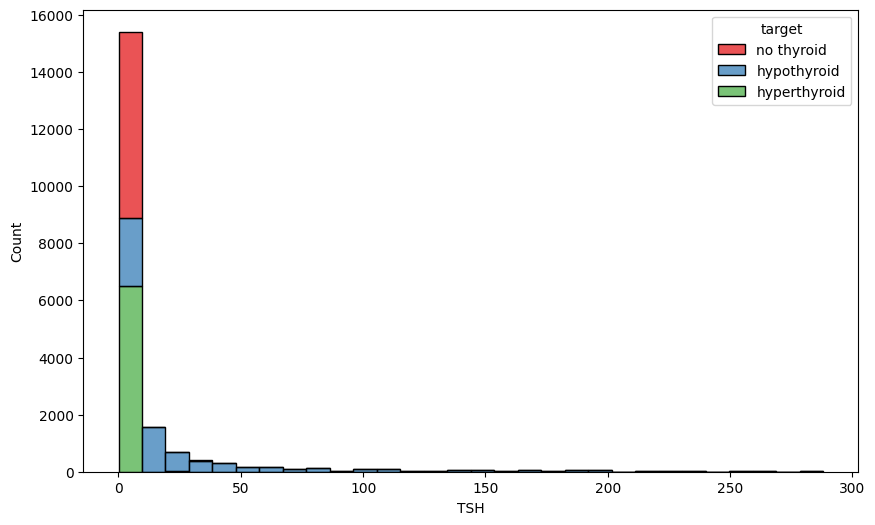

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='TSH', hue='target', multiple='stack', palette='Set1', bins=30)

plt.xlabel('TSH')
plt.ylabel('Count')

plt.show()


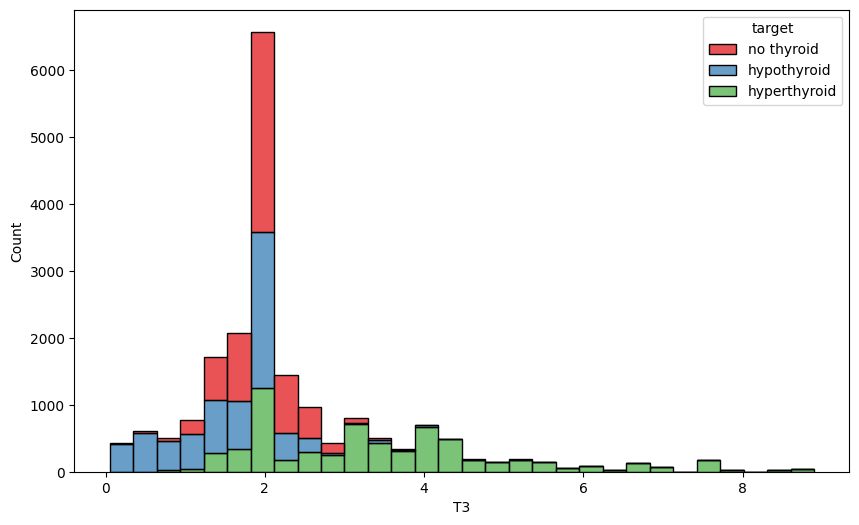

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='T3', hue='target', multiple='stack', palette='Set1', bins=30)

plt.xlabel('T3')
plt.ylabel('Count')
plt.show()


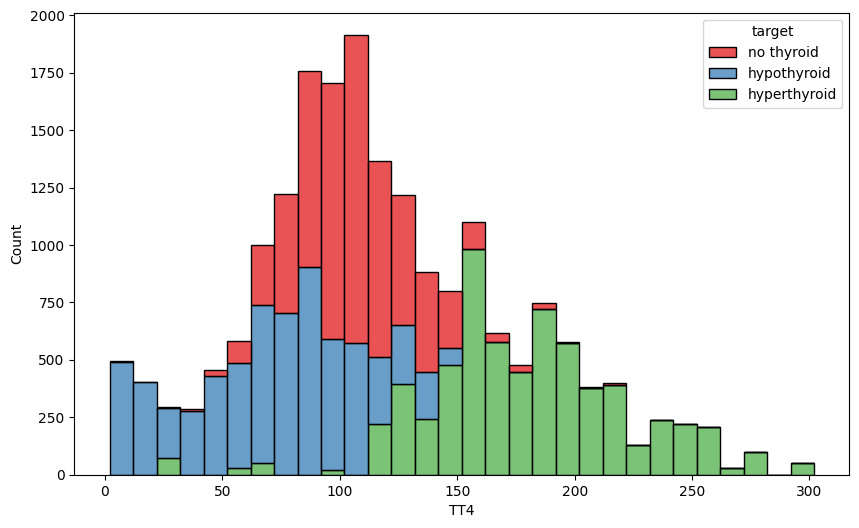

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='TT4', hue='target', multiple='stack', palette='Set1', bins=30)

plt.xlabel('TT4')
plt.ylabel('Count')
plt.show()


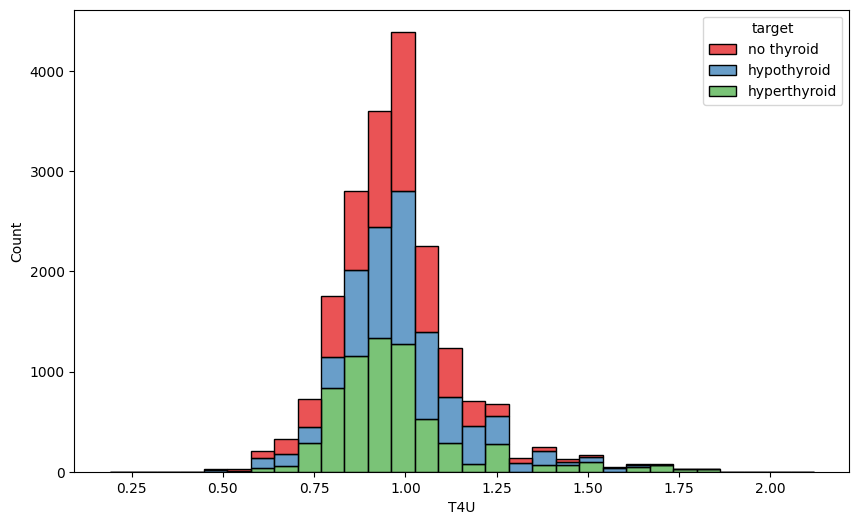

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='T4U', hue='target', multiple='stack', palette='Set1', bins=30)

plt.xlabel('T4U')
plt.ylabel('Count')
plt.show()


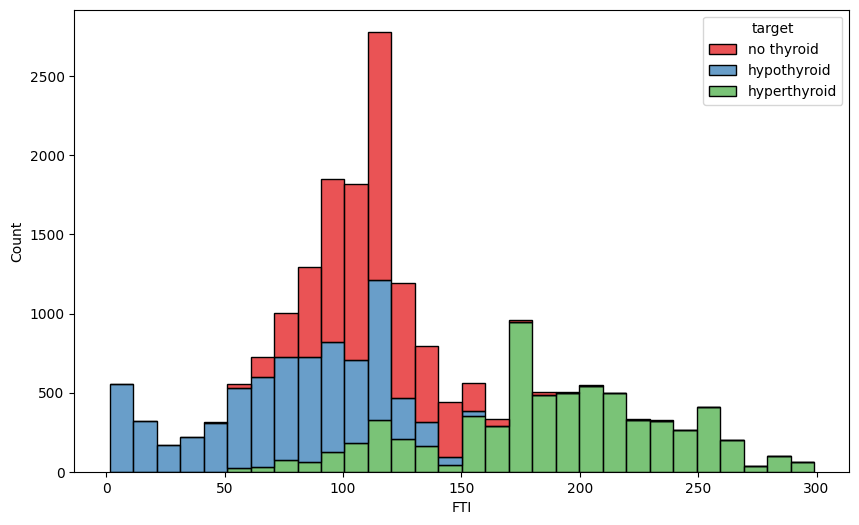

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfdup, x='FTI', hue='target', multiple='stack', palette='Set1', bins=30)

plt.xlabel('FTI')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='TT4', ylabel='FTI'>

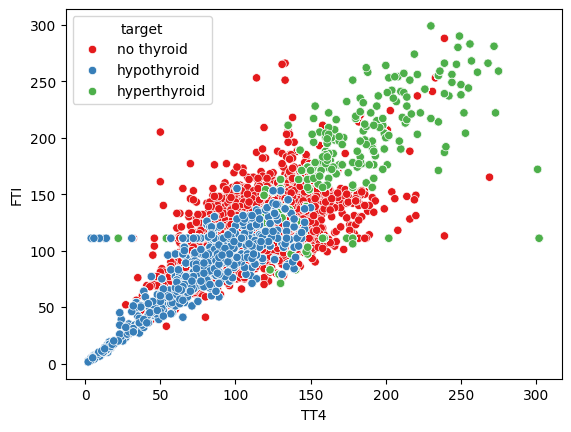

In [ ]:
sns.scatterplot(data=dfdup, x='TT4', y='FTI', hue='target',palette='Set1')

<Axes: xlabel='FTI', ylabel='TSH'>

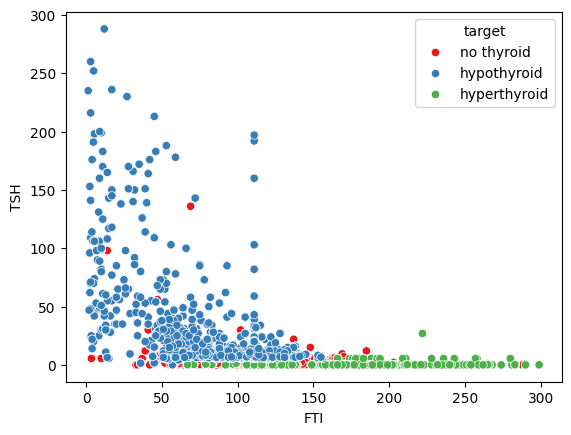

In [ ]:
sns.scatterplot(data=dfdup, x='FTI', y='TSH', hue='target',palette='Set1')

<Axes: xlabel='FTI', ylabel='T4U'>

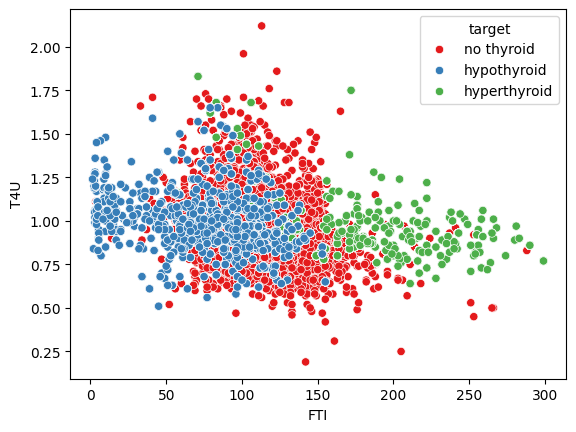

In [ ]:
sns.scatterplot(data=dfdup, x='FTI', y='T4U', hue='target',palette='Set1')

# Saving Dataset

In [ ]:
dfdup.to_csv("ExploredDf.csv")

# Feature Importance

In [ ]:
new_df=dfdup.copy()
new_df['target'] = np.where(new_df['target'] == 'no thyroid', 0,
                  np.where(new_df['target'] == 'hypothyroid', 1,
                  np.where(new_df['target'] == 'hyperthyroid', 2, np.nan)))

new_df['sex'] = np.where(new_df['sex'] == 'F', 0,1)
new_df['on_thyroxine'] = np.where(new_df['on_thyroxine'] == 'f', 0,1)
new_df['query_on_thyroxine'] = np.where(new_df['query_on_thyroxine'] == 'f', 0,1)
new_df['on_antithyroid_meds'] = np.where(new_df['on_antithyroid_meds'] == 'f', 0,1)
new_df['sick'] = np.where(new_df['sick'] == 'f', 0,1)

new_df['pregnant'] = np.where(new_df['pregnant'] == 'f', 0,1)

new_df['thyroid_surgery'] = np.where(new_df['thyroid_surgery'] == 'f', 0,1)
new_df['I131_treatment'] = np.where(new_df['I131_treatment'] == 'f', 0,1)
new_df['query_hypothyroid'] = np.where(new_df['query_hypothyroid'] == 'f', 0,1)
new_df['query_hyperthyroid'] = np.where(new_df['query_hyperthyroid'] == 'f', 0,1)
new_df['lithium'] = np.where(new_df['lithium'] == 'f', 0,1)
new_df['goitre'] = np.where(new_df['goitre'] == 'f', 0,1)
new_df['tumor'] = np.where(new_df['tumor'] == 'f', 0,1)
new_df['psych'] = np.where(new_df['psych'] == 'f', 0,1)
new_df['hypopituitary'] = np.where(new_df['psych'] == 'f', 0,1)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is the name of the column with labels
X = new_df.drop('target', axis=1)  # Features
y = new_df['target']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                Feature  Importance
16                  TSH    0.433626
20                  FTI    0.217042
18                  TT4    0.152690
17                   T3    0.113725
19                  T4U    0.021077
10   query_hyperthyroid    0.014176
0                   age    0.013793
13                tumor    0.009217
2          on_thyroxine    0.007231
9     query_hypothyroid    0.004252
1                   sex    0.003729
4   on_antithyroid_meds    0.002216
15                psych    0.002140
6              pregnant    0.001718
3    query_on_thyroxine    0.000797
5                  sick    0.000680
7       thyroid_surgery    0.000627
11              lithium    0.000467
12               goitre    0.000419
8        I131_treatment    0.000376
14        hypopituitary    0.000000


In [ ]:
#  Dropping redundant attributes
new_df.drop(['tumor','on_thyroxine','query_hypothyroid','on_antithyroid_meds','psych','pregnant','query_on_thyroxine','sick','thyroid_surgery','lithium','goitre','I131_treatment','hypopituitary'],axis=1, inplace=True)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19659 entries, 0 to 19658
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 19659 non-null  float64
 1   sex                 19659 non-null  int64  
 2   query_hyperthyroid  19659 non-null  int64  
 3   TSH                 19659 non-null  float64
 4   T3                  19659 non-null  float64
 5   TT4                 19659 non-null  float64
 6   T4U                 19659 non-null  float64
 7   FTI                 19659 non-null  float64
 8   target              19659 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


In [ ]:
new_df.to_csv("numericalDF.csv")